In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats

In [2]:
cd tmp

/home/team9/tmp


In [3]:
ls

data/


In [4]:

cd data

/home/team9/tmp/data


In [5]:
trips = pd.read_csv('rt_trips_DB_2018.txt', sep=";", parse_dates=[1])


In [6]:
weather_trips = pd.read_csv('weather_trips.csv')

In [7]:
weather_trips

,Unnamed: 0,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,date
0,0,1514768400,4.39,9999.0,11.80,Rain,light intensity shower rain,09n,2018-01-01 01:00:00
1,1,1514772000,5.39,9999.0,12.40,Clouds,scattered clouds,03n,2018-01-01 02:00:00
2,2,1514775600,5.39,9999.0,12.40,Clouds,scattered clouds,03n,2018-01-01 03:00:00
3,3,1514779200,5.39,9999.0,11.80,Clouds,scattered clouds,03n,2018-01-01 04:00:00
4,4,1514782800,5.39,9999.0,9.30,Clouds,broken clouds,04n,2018-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...
8754,8754,1546282800,10.36,9999.0,1.79,Clouds,broken clouds,04n,2018-12-31 19:00:00
8755,8755,1546286400,9.86,9999.0,0.45,Clouds,broken clouds,04n,2018-12-31 20:00:00
8756,8756,1546290000,9.86,9999.0,0.89,Clouds,broken clouds,04n,2018-12-31 21:00:00
8757,8757,1546293600,9.76,9999.0,1.79,Clouds,broken clouds,04n,2018-12-31 22:00:00


In [8]:
weather_trips = weather_trips.drop(columns=["Unnamed: 0"])


In [9]:
weather_trips.head(3)

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,date
0,1514768400,4.39,9999.0,11.8,Rain,light intensity shower rain,09n,2018-01-01 01:00:00
1,1514772000,5.39,9999.0,12.4,Clouds,scattered clouds,03n,2018-01-01 02:00:00
2,1514775600,5.39,9999.0,12.4,Clouds,scattered clouds,03n,2018-01-01 03:00:00


In [10]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,"


In [11]:
trips.describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID
count,2.182637e+06,2.182637e+06,2.182637e+06,2.182637e+06,2.045430e+06,2.018086e+06,0.0,4333.0,4330.000000
mean,7.149479e+06,1.504103e+00,5.507875e+04,5.153329e+04,5.506239e+04,5.170612e+04,NaN,0.0,237554.867667
std,7.314423e+05,4.999833e-01,1.742482e+04,1.757164e+04,1.733870e+04,1.752695e+04,NaN,0.0,34585.051789
min,5.955221e+06,1.000000e+00,1.820300e+04,1.620000e+04,1.754600e+04,1.597400e+04,NaN,0.0,177856.000000
25%,6.592584e+06,1.000000e+00,3.968300e+04,3.600000e+04,3.966800e+04,3.651800e+04,NaN,0.0,205506.500000
50%,7.110090e+06,2.000000e+00,5.527600e+04,5.160000e+04,5.518900e+04,5.161800e+04,NaN,0.0,233851.500000
75%,8.018241e+06,2.000000e+00,6.900600e+04,6.516000e+04,6.901900e+04,6.539800e+04,NaN,0.0,271506.750000
max,8.592207e+06,2.000000e+00,9.168000e+04,8.760000e+04,9.437800e+04,9.717700e+04,NaN,0.0,297899.000000


In [12]:
haveDepTime = trips[trips["ACTUALTIME_DEP"].notnull()]
haveDep_ArrTime = haveDepTime[haveDepTime["ACTUALTIME_ARR"].notnull()]
haveDep_ArrTime

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,"
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,"
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,"
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"


In [13]:
print(trips.shape[0] - haveDep_ArrTime.shape[0], 'trips are missing either actual departure or arrival times')

289270 trips are missing either actual departure or arrival times


In [14]:
trips.nunique()

DATASOURCE              1
DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68122
ACTUALTIME_DEP      66771
BASIN                   1
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
LASTUPDATE            360
NOTE                46690
dtype: int64

- 360 days of service - seems to be one for every day
- only 650k trip IDs but over 2 million lines - need to see why 

In [15]:
trips.loc[trips['TRIPID']==6765486]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
470885,DB,2018-05-17,6765486,33D,33D_62,2,29460,26400,30676.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:42:42,",3077688,"
2071391,DB,2018-05-18,6765486,33D,33D_62,2,29460,26400,29846.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:52:33,",3077688,"
2172425,DB,2018-05-16,6765486,33D,33D_62,2,29460,26400,30102.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:32:53,",3077688,"
2179562,DB,2018-05-15,6765486,33D,33D_62,2,29460,26400,30403.0,26416.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3077688,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"


Looks like the trip IDs are sometimes duplicated but on different days. Need to see if they are ever duplicated on the same day

In [16]:
sub_trips = trips[["DAYOFSERVICE", "TRIPID"]]

In [17]:
print(sub_trips.duplicated().sum(), "duplicated trip IDs on the same day.")

0 duplicated trip IDs on the same day.


Therefore trip ID is never reused on the same day.
- Can use it and day as a unique identifier

In [18]:
trips.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE                 object
NOTE                       object
dtype: object

Next I will convert the dates to days of the week

In [19]:
trips['DAYOFWEEK'] = trips['DAYOFSERVICE'].dt.weekday

In [20]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",2
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,",0
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,",0
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,",0


Next I will determine the hour of departure for the trip and the travel time

In [21]:
# dividing by seconds and minutes
trips['HOUR_DEPARTURE'] = trips['ACTUALTIME_DEP'].apply(lambda row: row//3600)

In [22]:
# getting arrival time minus departure, then dividing by 60 seconds
trips['JOURNEY_TIME'] = (trips['ACTUALTIME_ARR'] - trips['ACTUALTIME_DEP']).apply(lambda row: row/60)

In [23]:
trips['JOURNEY_TIME'].describe()

count    1.893367e+06
mean     6.422932e+01
std      2.391304e+01
min     -2.477667e+02
25%      4.671667e+01
50%      6.286667e+01
75%      8.075000e+01
max      3.909667e+02
Name: JOURNEY_TIME, dtype: float64

In [24]:
trips.loc[trips['SUPPRESSED']==0.0]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
1783,DB,2018-02-18,6269995,45A,45A_60,1,68767,65700,NaN,65746.0,BasDef,NaN,0.0,194642.0,26-FEB-18 11:09:33,",2428302,",6,18.0,NaN
2363,DB,2018-03-16,6399287,41C,41C_78,1,71543,68400,NaN,68643.0,BasDef,NaN,0.0,205589.0,26-MAR-18 12:55:43,",1741586,",4,19.0,NaN
3485,DB,2018-09-28,7758815,13,13_72,2,77076,72000,77726.0,NaN,BasDef,NaN,0.0,271333.0,18-OCT-18 18:30:27,",2589790,",4,NaN,NaN
3873,DB,2018-02-18,6277942,54A,54A_12,2,56910,54000,NaN,53972.0,BasDef,NaN,0.0,194644.0,26-FEB-18 11:09:33,",1752467,",6,14.0,NaN
4353,DB,2018-03-10,6400436,16,16_20,1,66230,61200,NaN,63250.0,BasDef,NaN,0.0,204650.0,19-MAR-18 14:54:09,",1892345,",5,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180333,DB,2018-05-15,6756431,40D,40D_101,1,83064,81000,NaN,80899.0,BasDef,NaN,0.0,231822.0,26-JUN-18 09:23:03,",2837996,",1,22.0,NaN
2181600,DB,2018-05-14,6761229,46A,46A_67,2,62024,56880,61946.0,NaN,BasDef,NaN,0.0,231784.0,26-JUN-18 09:13:13,",3064930,",0,NaN,NaN
2181789,DB,2018-05-15,6759169,66,66_13,2,41797,38100,41937.0,NaN,BasDef,NaN,0.0,231826.0,26-JUN-18 09:23:03,",2295846,",1,NaN,NaN
2182138,DB,2018-05-15,6753428,123,123_34,1,60475,56400,60008.0,NaN,BasDef,NaN,0.0,231813.0,26-JUN-18 09:23:03,",3218907,",1,NaN,NaN


In [25]:
trips.loc[trips['SUPPRESSED']==0.0].describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
count,4.333000e+03,4333.000000,4333.000000,4333.000000,2202.000000,2576.000000,0.0,4333.0,4330.000000,4333.000000,2576.000000,791.000000
mean,7.078477e+06,1.386568,54876.179321,51063.752596,54927.642598,51024.471661,NaN,0.0,237554.867667,2.782368,13.685947,78.655162
std,7.280043e+05,0.487019,14723.724563,14726.980330,14974.037460,14625.331959,NaN,0.0,34585.051789,1.876974,4.061992,34.276970
min,5.955374e+06,1.000000,20621.000000,18900.000000,23058.000000,19069.000000,NaN,0.0,177856.000000,0.000000,5.000000,0.316667
25%,6.394961e+06,1.000000,42748.000000,39600.000000,43299.250000,38748.250000,NaN,0.0,205506.500000,1.000000,10.000000,54.925000
50%,6.871374e+06,1.000000,55253.000000,51300.000000,56069.000000,49778.500000,NaN,0.0,233851.500000,3.000000,13.000000,71.300000
75%,7.781073e+06,2.000000,66311.000000,62400.000000,66084.000000,62684.250000,NaN,0.0,271506.750000,4.000000,17.000000,99.308333
max,8.591894e+06,2.000000,88164.000000,84600.000000,87978.000000,84607.000000,NaN,0.0,297899.000000,6.000000,23.000000,200.866667


Not sure why there would be a negative - will investigate

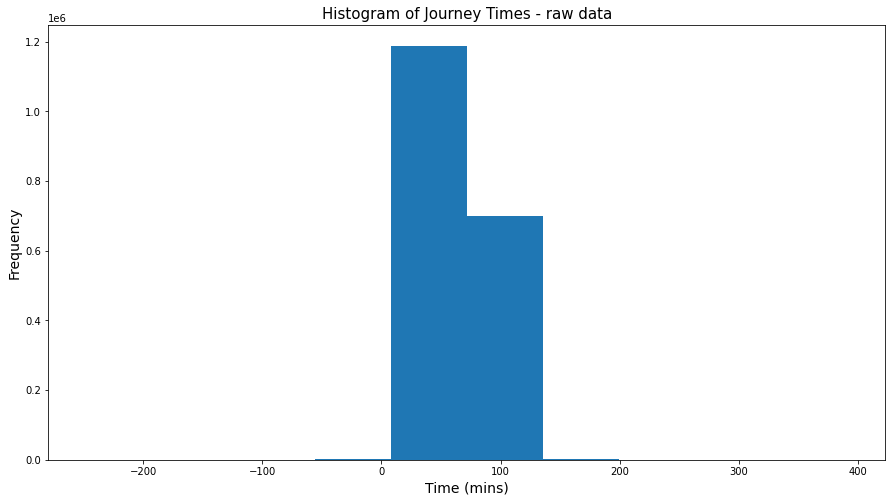

In [26]:
# plotting the journey time data
plt.figure(figsize=(15,8))
plt.title("Histogram of Journey Times - raw data", fontsize=15)
plt.xlabel("Time (mins)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.hist(trips['JOURNEY_TIME'])

plt.show()

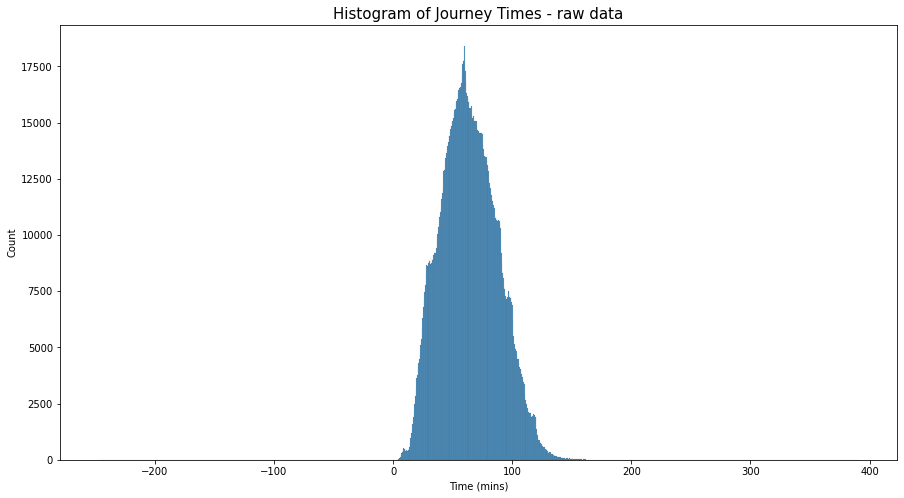

In [27]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(trips['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

plt.title('Histogram of Journey Times - raw data')
plt.show()



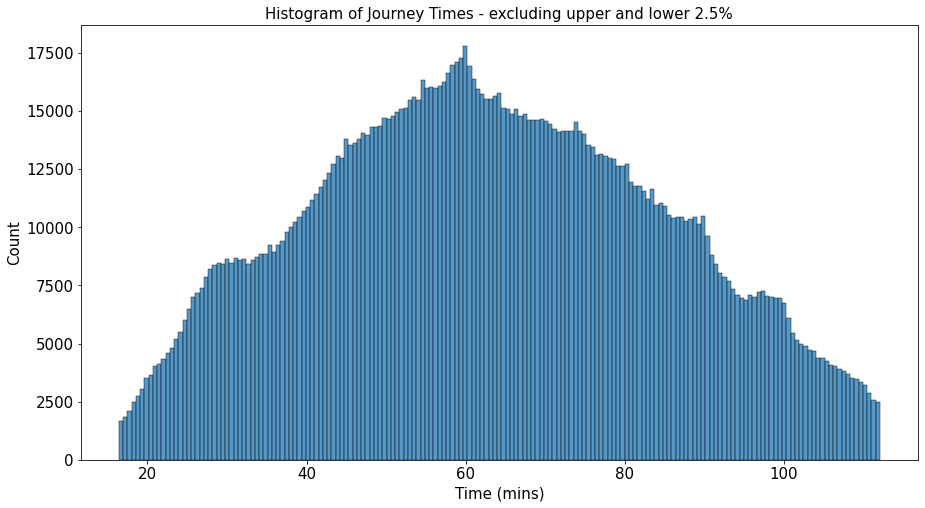

In [28]:
# calculate value 2 standard deviations above the mean
topTwoSDs = trips['JOURNEY_TIME'].mean() + (2*trips['JOURNEY_TIME'].std())
bottomTwoSDs = trips['JOURNEY_TIME'].mean() - (2*trips['JOURNEY_TIME'].std())
tripsNoOutliers = trips.loc[trips['JOURNEY_TIME'] < topTwoSDs]
tripsNoOutliers = tripsNoOutliers.loc[trips['JOURNEY_TIME'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(tripsNoOutliers['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

plt.title('Histogram of Journey Times - excluding upper and lower 2.5%')
plt.show()

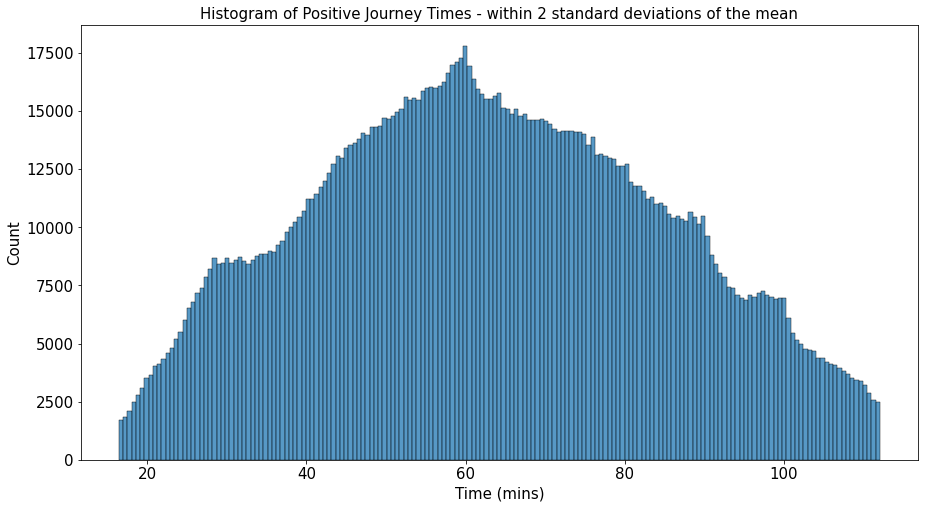

In [29]:
# calculate value 2 standard deviations above the mean
noNegTrips = trips.loc[trips['JOURNEY_TIME'] > 0]
topTwoSDs = noNegTrips['JOURNEY_TIME'].mean() + (2*noNegTrips['JOURNEY_TIME'].std())
bottomTwoSDs = noNegTrips['JOURNEY_TIME'].mean() - (2*noNegTrips['JOURNEY_TIME'].std())
tripsNoOutliers = noNegTrips.loc[noNegTrips['JOURNEY_TIME'] < topTwoSDs]
tripsNoOutliers = tripsNoOutliers.loc[tripsNoOutliers['JOURNEY_TIME'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(tripsNoOutliers['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

plt.title('Histogram of Positive Journey Times - within 2 standard deviations of the mean')
plt.show()

In [30]:
print(tripsNoOutliers['JOURNEY_TIME'].max())
print(tripsNoOutliers['JOURNEY_TIME'].min())

112.03333333333333
16.433333333333334


In [31]:
bottomTwoSDs

16.430551337320423

In [32]:
noNegTrips.loc[noNegTrips['JOURNEY_TIME']<0.2]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
1121264,DB,2018-03-22,6394554,43,43_88,2,70675,68400,71702.0,71701.0,BasDef,NaN,NaN,NaN,04-APR-18 08:59:06,",2632952,",3,19.0,0.016667
1939153,DB,2018-11-14,8121047,33A,33A_22,1,64398,61200,65607.0,65606.0,BasDef,NaN,NaN,NaN,22-NOV-18 13:39:08,",1734800,",2,18.0,0.016667
2166184,DB,2018-01-02,5963180,44B,44B_60,1,29686,27900,29370.0,29367.0,BasDef,NaN,NaN,NaN,09-JAN-18 20:18:05,",1720843,",1,8.0,0.050000


Seems as though these rows should be dropped

- First I will remove those journeys below 0
- I will then remove the top and bottom 2.5% from each route in each direction individually, so as to ensure the uniqueness of each route is preserved -> some routes are much longer than others and so on

I will need to create a new column for each route in each direction. This is done below.

In [33]:
trips = trips.loc[trips['JOURNEY_TIME']>0]

In [34]:
shorts = trips.loc[trips['JOURNEY_TIME']<10]

In [35]:
shorts.nunique()

DATASOURCE            1
DAYOFSERVICE        314
TRIPID             1256
LINEID               50
ROUTEID              72
DIRECTION             2
PLANNEDTIME_ARR     678
PLANNEDTIME_DEP      93
ACTUALTIME_ARR     2429
ACTUALTIME_DEP     2140
BASIN                 1
TENDERLOT             0
SUPPRESSED            1
JUSTIFICATIONID       7
LASTUPDATE          314
NOTE                163
DAYOFWEEK             7
HOUR_DEPARTURE       18
JOURNEY_TIME        347
dtype: int64

- check online found that ther atually were routes which were extremely short (eg 185) so it is difficult to tell which pieces of data are wrong.
- clear that not all are valid though as the second line from the bottom is the 46a which is a long route.


Once I have the data split into the bus routes I will remove the top and bottom 2.5% from each

In [36]:
print(len(trips.loc[trips['JOURNEY_TIME']<5]))

67


In [37]:
short_5 = trips.loc[trips['JOURNEY_TIME']<5]

In [38]:
short_5

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
41164,DB,2018-12-30,8585049,41C,41C_83,1,74734,72000,72379.0,72328.0,BasDef,NaN,NaN,NaN,16-JAN-19 18:16:31,",3378321,",6,20.0,0.850000
93542,DB,2018-02-06,6256812,111,111_10,2,84911,84600,84861.0,84568.0,BasDef,NaN,NaN,NaN,28-FEB-18 11:48:21,",2789836,",1,23.0,4.883333
96152,DB,2018-10-12,8019985,77A,77A_29,1,83101,79200,82931.0,82813.0,BasDef,NaN,NaN,NaN,20-NOV-18 15:30:07,",2965213,2965213,",4,23.0,1.966667
101351,DB,2018-01-15,6120858,111,111_10,2,84951,84600,84856.0,84578.0,BasDef,NaN,NaN,NaN,23-JAN-18 10:24:03,",2789836,",0,23.0,4.633333
137971,DB,2018-03-20,6402084,111,111_10,2,84981,84600,84871.0,84597.0,BasDef,NaN,NaN,NaN,28-MAR-18 15:03:15,",2789836,",1,23.0,4.566667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090487,DB,2018-04-02,6590622,17A,17A_13,2,68376,64800,68602.0,68358.0,BasDef,NaN,NaN,NaN,10-APR-18 15:19:02,",1722094,1722094,",0,18.0,4.066667
2102508,DB,2018-11-01,8068163,150,150_8,1,75603,73800,76167.0,75920.0,BasDef,NaN,NaN,NaN,29-NOV-18 07:38:40,",2961346,2961346,",3,21.0,4.116667
2148455,DB,2018-05-22,6782309,4,4_10,1,60314,55800,60885.0,60845.0,BasDef,NaN,NaN,NaN,13-JUN-18 18:52:05,",2615620,2615620,",1,16.0,0.666667
2157391,DB,2018-05-28,6846997,185,185_57,2,56855,56400,56393.0,56099.0,BasDef,NaN,NaN,NaN,14-JUN-18 13:31:37,",2817949,",0,15.0,4.900000


- noticeably less routes under 5 minutes and upon inspection some of the routes (111, 44b, 4, 41c )on moovit it was clear that they were corrupted data

In [39]:
# trips = trips.loc[trips['JOURNEY_TIME']>5]

Below I am creating a new categorical column, with each category representing a route in a particular direction

In [40]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2,23.0,48.733333
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2,8.0,70.783333
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2,15.0,67.000000
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2,22.0,51.233333
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,",2,10.0,74.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,",0,8.0,22.716667
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,",0,18.0,24.250000
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,",0,7.0,47.166667
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0,16.0,58.433333


- before splitting into seperate routes to analyse I'm removing unnecessary columns and adding the weather data.

In [41]:
trips = trips.drop({'TENDERLOT', "JUSTIFICATIONID", "DATASOURCE", "LASTUPDATE", "NOTE","BASIN", "ROUTEID"}, axis=1)


In [42]:
trips

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,2018-02-07,6253783,68,1,87245,84600,87524.0,84600.0,NaN,2,23.0,48.733333
2,2018-02-07,6254942,45A,2,35512,32100,36329.0,32082.0,NaN,2,8.0,70.783333
3,2018-02-07,6259460,25A,1,57261,54420,58463.0,54443.0,NaN,2,15.0,67.000000
4,2018-02-07,6253175,14,1,85383,81600,84682.0,81608.0,NaN,2,22.0,51.233333
5,2018-02-07,6248240,77A,2,41648,37200,42019.0,37538.0,NaN,2,10.0,74.683333
...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,2018-05-14,6765652,53,2,30626,29100,30482.0,29119.0,NaN,0,8.0,22.716667
2182630,2018-05-14,6765662,53,2,65950,64800,66270.0,64815.0,NaN,0,18.0,24.250000
2182631,2018-05-14,6765828,45A,1,28647,25800,28688.0,25858.0,NaN,0,7.0,47.166667
2182632,2018-05-14,6765849,123,2,61560,57840,61365.0,57859.0,NaN,0,16.0,58.433333


In [43]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
SUPPRESSED                float64
DAYOFWEEK                   int64
HOUR_DEPARTURE            float64
JOURNEY_TIME              float64
dtype: object

In [44]:
weather_trips.dtypes

dt                       int64
temp                   float64
visibility             float64
wind_speed             float64
weather_main            object
weather_description     object
weather_icon            object
date                    object
dtype: object

In [45]:
def date_from_epoch(x):
    y = dt.datetime.fromtimestamp (x).strftime('%Y-%m-%d')
    return y   

weather_trips['DAYOFSERVICE'] = weather_trips['dt'].apply(lambda x: date_from_epoch(x))

In [46]:
weather_trips

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,date,DAYOFSERVICE
0,1514768400,4.39,9999.0,11.80,Rain,light intensity shower rain,09n,2018-01-01 01:00:00,2018-01-01
1,1514772000,5.39,9999.0,12.40,Clouds,scattered clouds,03n,2018-01-01 02:00:00,2018-01-01
2,1514775600,5.39,9999.0,12.40,Clouds,scattered clouds,03n,2018-01-01 03:00:00,2018-01-01
3,1514779200,5.39,9999.0,11.80,Clouds,scattered clouds,03n,2018-01-01 04:00:00,2018-01-01
4,1514782800,5.39,9999.0,9.30,Clouds,broken clouds,04n,2018-01-01 05:00:00,2018-01-01
...,...,...,...,...,...,...,...,...,...
8754,1546282800,10.36,9999.0,1.79,Clouds,broken clouds,04n,2018-12-31 19:00:00,2018-12-31
8755,1546286400,9.86,9999.0,0.45,Clouds,broken clouds,04n,2018-12-31 20:00:00,2018-12-31
8756,1546290000,9.86,9999.0,0.89,Clouds,broken clouds,04n,2018-12-31 21:00:00,2018-12-31
8757,1546293600,9.76,9999.0,1.79,Clouds,broken clouds,04n,2018-12-31 22:00:00,2018-12-31


In [47]:
def round_epoch_hour(x):
    day = x // 86400
    day = day * 86400
    time = x - day
    round_time = time // 3600
    return round_time

In [48]:
weather_trips['HOUR_DEPARTURE'] = weather_trips['dt'].apply(lambda x: round_epoch_hour(x))

In [49]:
weather_trips

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,date,DAYOFSERVICE,HOUR_DEPARTURE
0,1514768400,4.39,9999.0,11.80,Rain,light intensity shower rain,09n,2018-01-01 01:00:00,2018-01-01,1
1,1514772000,5.39,9999.0,12.40,Clouds,scattered clouds,03n,2018-01-01 02:00:00,2018-01-01,2
2,1514775600,5.39,9999.0,12.40,Clouds,scattered clouds,03n,2018-01-01 03:00:00,2018-01-01,3
3,1514779200,5.39,9999.0,11.80,Clouds,scattered clouds,03n,2018-01-01 04:00:00,2018-01-01,4
4,1514782800,5.39,9999.0,9.30,Clouds,broken clouds,04n,2018-01-01 05:00:00,2018-01-01,5
...,...,...,...,...,...,...,...,...,...,...
8754,1546282800,10.36,9999.0,1.79,Clouds,broken clouds,04n,2018-12-31 19:00:00,2018-12-31,19
8755,1546286400,9.86,9999.0,0.45,Clouds,broken clouds,04n,2018-12-31 20:00:00,2018-12-31,20
8756,1546290000,9.86,9999.0,0.89,Clouds,broken clouds,04n,2018-12-31 21:00:00,2018-12-31,21
8757,1546293600,9.76,9999.0,1.79,Clouds,broken clouds,04n,2018-12-31 22:00:00,2018-12-31,22


In [50]:
weather_trips.dtypes

dt                       int64
temp                   float64
visibility             float64
wind_speed             float64
weather_main            object
weather_description     object
weather_icon            object
date                    object
DAYOFSERVICE            object
HOUR_DEPARTURE           int64
dtype: object

In [51]:
weather_trips.isna().sum()

dt                     0
temp                   0
visibility             0
wind_speed             0
weather_main           0
weather_description    0
weather_icon           0
date                   0
DAYOFSERVICE           0
HOUR_DEPARTURE         0
dtype: int64

In [52]:
weather_trips["DAYOFSERVICE"] =  weather_trips["DAYOFSERVICE"].astype("datetime64[ns]") 
# weather_trips["weather_description"] =  weather_trips["weather_description"].astype("int8")
# weather_trips["weather_icon"] =  weather_trips["weather_icon"].astype("int8") 
weather_trips["HOUR_DEPARTURE"] =  weather_trips["HOUR_DEPARTURE"].astype("int8") 



<AxesSubplot:>

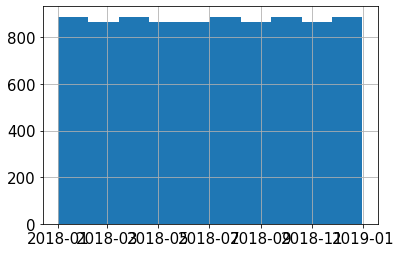

In [53]:
weather_trips["DAYOFSERVICE"].hist()

In [54]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
SUPPRESSED                float64
DAYOFWEEK                   int64
HOUR_DEPARTURE            float64
JOURNEY_TIME              float64
dtype: object

In [55]:
trips["HOUR_DEPARTURE"] =  trips["HOUR_DEPARTURE"].astype("int8") 
trips["ACTUALTIME_ARR"] =  trips["ACTUALTIME_ARR"].astype("int64") 
trips["ACTUALTIME_DEP"] =  trips["ACTUALTIME_DEP"].astype("int64") 

In [56]:
trips.loc[trips['HOUR_DEPARTURE']>23]

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
2341,2018-03-16,6398188,69,2,88571,86700,88866,87199,NaN,4,24,27.783333
5986,2018-10-10,8029591,68,2,89100,87300,90142,87363,NaN,2,24,46.316667
6097,2018-10-10,8025106,65,2,91024,87300,90404,87293,NaN,2,24,51.850000
7147,2018-04-11,6620098,65,2,90870,87300,90725,87271,NaN,2,24,57.566667
8162,2018-02-18,6263193,68,2,88740,87000,88823,87377,NaN,6,24,24.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
2172752,2018-05-16,6759661,38,2,86390,84600,89667,87797,NaN,2,24,31.166667
2175634,2018-05-27,6845502,68,2,88740,87000,89070,87535,NaN,6,24,25.583333
2178416,2018-05-15,6767648,65,2,90847,87300,90702,87197,NaN,1,24,58.416667
2180117,2018-05-15,6761211,68,2,89100,87300,88575,87247,NaN,1,24,22.133333


Before merging we need to do something about the routes that left after midnight, as these will not automatically have a matching time.

In [57]:
trips['DAYOFSERVICEMERGE'] = trips['DAYOFSERVICE']
trips['HOUR_DEPARTUREMERGE'] = trips['HOUR_DEPARTURE']

In [58]:
# cell takes a while to run

In [59]:
for index, row in trips.iterrows():
    # if 24 then change to midnight and increase day by 1
    if row['HOUR_DEPARTURE'] == 24:
        trips.loc[index,'HOUR_DEPARTUREMERGE'] = 0
        trips.loc[index,'DAYOFSERVICEMERGE']= row['DAYOFSERVICE'] + dt.timedelta(days=1)
#     # day clocks changed
#     if row['DAYOFSERVICE'] == '2018-03-25':
#         print('now')
#         if row['HOUR_DEPARTURE'] == 23:
  
#             print('he')
#             trips.loc[index,'HOUR_DEPARTUREMERGE'] = 0
#             trips.loc[index,'DAYOFSERVICEMERGE']= row['DAYOFSERVICE'] + dt.timedelta(days=1)

In [60]:
# trips.loc

In [61]:
# need to rename weather columns to merge
weather_trips.rename(columns={'DAYOFSERVICE':'DAYOFSERVICEMERGE'},inplace=True)
weather_trips.rename(columns={'HOUR_DEPARTURE':'HOUR_DEPARTUREMERGE'},inplace=True)

In [62]:
# check changes correctly applied
trips.loc[trips['HOUR_DEPARTURE']>23]

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,DAYOFSERVICEMERGE,HOUR_DEPARTUREMERGE
2341,2018-03-16,6398188,69,2,88571,86700,88866,87199,NaN,4,24,27.783333,2018-03-17,0
5986,2018-10-10,8029591,68,2,89100,87300,90142,87363,NaN,2,24,46.316667,2018-10-11,0
6097,2018-10-10,8025106,65,2,91024,87300,90404,87293,NaN,2,24,51.850000,2018-10-11,0
7147,2018-04-11,6620098,65,2,90870,87300,90725,87271,NaN,2,24,57.566667,2018-04-12,0
8162,2018-02-18,6263193,68,2,88740,87000,88823,87377,NaN,6,24,24.100000,2018-02-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172752,2018-05-16,6759661,38,2,86390,84600,89667,87797,NaN,2,24,31.166667,2018-05-17,0
2175634,2018-05-27,6845502,68,2,88740,87000,89070,87535,NaN,6,24,25.583333,2018-05-28,0
2178416,2018-05-15,6767648,65,2,90847,87300,90702,87197,NaN,1,24,58.416667,2018-05-16,0
2180117,2018-05-15,6761211,68,2,89100,87300,88575,87247,NaN,1,24,22.133333,2018-05-16,0


In [63]:
trips = pd.merge(trips, weather_trips, on=['DAYOFSERVICEMERGE', 'HOUR_DEPARTUREMERGE'], how='left')

In [64]:
trips.isnull().sum()

DAYOFSERVICE                 0
TRIPID                       0
LINEID                       0
DIRECTION                    0
PLANNEDTIME_ARR              0
PLANNEDTIME_DEP              0
ACTUALTIME_ARR               0
ACTUALTIME_DEP               0
SUPPRESSED             1892587
DAYOFWEEK                    0
HOUR_DEPARTURE               0
JOURNEY_TIME                 0
DAYOFSERVICEMERGE            0
HOUR_DEPARTUREMERGE          0
dt                         121
temp                       121
visibility                 121
wind_speed                 121
weather_main               121
weather_description        121
weather_icon               121
date                       121
dtype: int64

In [65]:
# no need for these now
trips=trips.drop(columns=['DAYOFSERVICEMERGE','HOUR_DEPARTUREMERGE'])

In [73]:
trips.loc[trips['temp'].isna()]

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,date


In [67]:
# nulls = trips['temp'].isnull() | trips['visibility'].isnull() | trips['wind_speed'].isnull() | trips['weather_description'].isnull() | trips['weather_icon'].isnull()


In [68]:
# trips[nulls]

In [69]:
# trips['temp'] = trips['temp'].fillna(-1)
# trips['visibility'] = trips['visibility'].fillna(-1)
# trips['wind_speed'] = trips['wind_speed'].fillna(-1)
# trips['weather_description'] = trips['weather_description'].fillna(-1)
# trips['weather_icon'] = trips['weather_icon'].fillna(-1)

In [70]:
# trips[nulls]

##### Decided to remove all of the rows without weather data as it would cause unnecessary confusion to the model.

In [71]:
trips = trips.dropna(subset=['temp'])


In [72]:
trips.dtypes

DAYOFSERVICE           datetime64[ns]
TRIPID                          int64
LINEID                         object
DIRECTION                       int64
PLANNEDTIME_ARR                 int64
PLANNEDTIME_DEP                 int64
ACTUALTIME_ARR                  int64
ACTUALTIME_DEP                  int64
SUPPRESSED                    float64
DAYOFWEEK                       int64
HOUR_DEPARTURE                   int8
JOURNEY_TIME                  float64
dt                            float64
temp                          float64
visibility                    float64
wind_speed                    float64
weather_main                   object
weather_description            object
weather_icon                   object
date                           object
dtype: object

- creating column to divide journeys by direction
- using line id instead of route id because it isn't necessary for the basic modelling as we have no stop information in the trips file.

In [74]:
trips['LINE_DIRECTION'] = trips['LINEID'] + '_' + trips['DIRECTION'].astype(str)

In [75]:
trips['LINE_DIRECTION'] = trips['LINE_DIRECTION'].astype('category')

In [76]:
print(len(trips['LINE_DIRECTION'].unique().tolist()),'categories')

252 categories


In [77]:
trips = trips.drop({"DIRECTION", "LINEID", "dt"}, axis=1)

I will now remove the top and bottom 2.5% from each LINE_DIRECTION so I am left with 2 standard deviations above and below the mean for each.

In [78]:
trips['JOURNEY_TIME'].isnull().sum()

0

In [79]:
# create a list of all line_directions
allLineDirections = trips['LINE_DIRECTION'].unique().tolist()

In [80]:
## below cell takes quite a while to run

In [81]:
# initialise counter to see how many are removed
removercounter = 0
# loop through direction list
for direction in allLineDirections:
    # create a new dataframe for direction
    subdataframe = trips[trips['LINE_DIRECTION'].isin([direction])]
    mean = subdataframe["JOURNEY_TIME"].mean()
    std2 = 2*subdataframe["JOURNEY_TIME"].std()
    upper = mean + std2
    lower = mean - std2
    # iterate through this dataframe
    for index, row in subdataframe.iterrows():
        # check if time is above/below 2 standard deviations
        if row['JOURNEY_TIME'] > upper or row['JOURNEY_TIME'] < lower:
            # apply change to dfclean, not new dataframe
            trips.loc[index,'JOURNEY_TIME'] = np.nan
            removercounter += 1
    print(direction)

print(removercounter, "journey times removed.")

68_1
45A_2
25A_1
14_1
77A_2
39_2
16_1
40D_1
27B_2
142_2
83_2
130_1
15_1
46A_1
33_1
7_2
39A_1
39A_2
1_2
41_2
67X_1
59_1
9_1
40_1
239_2
130_2
84_1
53_1
185_1
41_1
40D_2
151_1
13_2
15B_1
65B_2
29A_2
33_2
61_1
140_1
123_1
14_2
7_1
79A_1
38A_2
46A_2
31_2
15B_2
69_2
44_2
42_1
67_2
184_1
238_2
145_1
17A_1
83_1
32_1
27A_1
17_2
27X_1
122_2
25A_2
54A_2
66_1
150_1
56A_1
37_2
27_2
27A_2
42_2
15A_2
65_2
123_2
145_2
9_2
150_2
47_1
76_2
79_2
79A_2
83A_1
63_1
33B_1
27B_1
4_1
120_2
41C_1
16_2
70_2
84A_2
220_2
151_2
32X_1
17_1
68A_1
1_1
84X_1
41C_2
38_2
102_2
83A_2
37_1
270_1
77A_1
51X_2
65B_1
76_1
33X_2
75_2
220_1
26_2
270_2
66A_1
29A_1
69_1
31A_1
49_2
111_2
185_2
122_1
18_1
15_2
120_1
11_1
14C_2
67_1
70_1
65_1
33X_1
13_1
40_2
39_1
114_1
26_1
4_2
68_2
75_1
76A_1
44B_2
79_1
31A_2
32_2
140_2
102_1
38A_1
7A_2
43_1
25_2
17A_2
18_2
66_2
104_2
15A_1
11_2
84_2
33A_2
16C_2
238_1
239_1
42D_1
7A_1
38_1
66A_2
25_1
31B_2
66X_2
31D_2
33D_1
27_1
43_2
39X_2
104_1
44_1
184_2
56A_2
31_1
41B_2
61_2
25B_1
53_2
84X_2
67X_

In [82]:
initial = trips.shape[0]
trips = trips.dropna(subset=['JOURNEY_TIME'])
after = trips.shape[0]
print(initial-after, "rows were deleted.")

82687 rows were deleted.


In [100]:
trips = trips.reset_index(drop=True)

##### creating temporry columns to identify outliers 

In [101]:
trips['planned_journey_time'] = (trips['PLANNEDTIME_ARR'] - trips['PLANNEDTIME_DEP']).apply(lambda row: row/60)

In [102]:
trips["error"] = (trips["JOURNEY_TIME"] - trips['planned_journey_time'])

In [103]:
trips

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,date,LINE_DIRECTION,planned_journey_time,error
0,2018-02-07,6253783,87245,84600,87524,84600,NaN,2,23,48.733333,6.39,9999.0,7.2,Drizzle,light intensity drizzle,09n,2018-02-07 23:00:00,68_1,44.083333,4.650000
1,2018-02-07,6254942,35512,32100,36329,32082,NaN,2,8,70.783333,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,2018-02-07 08:00:00,45A_2,56.866667,13.916667
2,2018-02-07,6259460,57261,54420,58463,54443,NaN,2,15,67.000000,4.39,9999.0,5.1,Drizzle,light intensity drizzle,09d,2018-02-07 15:00:00,25A_1,47.350000,19.650000
3,2018-02-07,6248240,41648,37200,42019,37538,NaN,2,10,74.683333,0.39,9999.0,5.7,Clouds,broken clouds,04d,2018-02-07 10:00:00,77A_2,74.133333,0.550000
4,2018-02-07,6251760,34768,28920,35709,28929,NaN,2,8,113.000000,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,2018-02-07 08:00:00,39_2,97.466667,15.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810565,2018-05-14,6765652,30626,29100,30482,29119,NaN,0,8,22.716667,12.39,9999.0,3.6,Clouds,broken clouds,04d,2018-05-14 08:00:00,53_2,25.433333,-2.716667
1810566,2018-05-14,6765662,65950,64800,66270,64815,NaN,0,18,24.250000,16.46,9999.0,0.5,Clouds,broken clouds,04d,2018-05-14 18:00:00,53_2,19.166667,5.083333
1810567,2018-05-14,6765828,28647,25800,28688,25858,NaN,0,7,47.166667,11.39,9999.0,2.6,Clouds,broken clouds,04d,2018-05-14 07:00:00,45A_1,47.450000,-0.283333
1810568,2018-05-14,6765849,61560,57840,61365,57859,NaN,0,16,58.433333,15.46,9999.0,2.6,Clouds,broken clouds,04d,2018-05-14 16:00:00,123_2,62.000000,-3.566667


In [108]:
trips.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
SUPPRESSED                     float64
DAYOFWEEK                     category
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                    object
weather_description             object
weather_icon                    object
date                            object
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
dtype: object

In [87]:
trips.error.max()

80.31666666666666

In [88]:
trips.error.min()

-184.21666666666667

- Average error is 5.57 minutes
- Obviously some incorrect data if a line can be almost 4 hours early
- Top 25 percentile is 10 minutes late.
- Bottom 25 percentile is 16 minutes early.
- Likely that some particular bus lines are very infrequent, with large error (based on my personal experience).
- Don't want to be too strict with outliers as it is likely that there are certain days of the year where long delays are extremely common. eg pride day or saint patrick's day
- Early arrivals will 
###### Decided to set outlier mark at 20 minutes early and late.

In [ ]:
# trips = trips[(trips.error < 20) & (trips.error > -20)]


In [5]:
# avoid having to run the above every time
trips.to_csv('./trips_modelling.csv')

NameError: name 'trips' is not defined

In [40]:
trips_modelling = pd.read_csv('trips_modelling.csv', sep=",")

In [41]:
trips_modelling["DAYOFSERVICE"] =  trips_modelling["DAYOFSERVICE"].astype("datetime64[ns]") 

In [42]:
trips_modelling = trips_modelling.drop(columns=["Unnamed: 0"])
trips_modelling['DAYOFWEEK'] = trips_modelling['DAYOFWEEK'].astype('category')
trips_modelling['LINE_DIRECTION'] = trips_modelling['LINE_DIRECTION'].astype('category')

In [43]:
trips_modelling["HOUR_DEPARTURE"] =  trips_modelling["HOUR_DEPARTURE"].astype("category")
trips_modelling["weather_main"] =  trips_modelling["weather_main"].astype("category")



In [44]:
trips_modelling.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
SUPPRESSED                     float64
DAYOFWEEK                     category
HOUR_DEPARTURE                category
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                  category
weather_description             object
weather_icon                    object
date                            object
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
dtype: object

In [45]:
# looking at correlations between weather features the target feature
correlations = trips_modelling[['temp','visibility','wind_speed', 'JOURNEY_TIME']].corr()
correlations

,temp,visibility,wind_speed,JOURNEY_TIME
temp,1.000000,0.150026,-0.140033,0.020168
visibility,0.150026,1.000000,0.007869,0.010198
wind_speed,-0.140033,0.007869,1.000000,0.044549
JOURNEY_TIME,0.020168,0.010198,0.044549,1.000000


<b>Encoding hours</b>

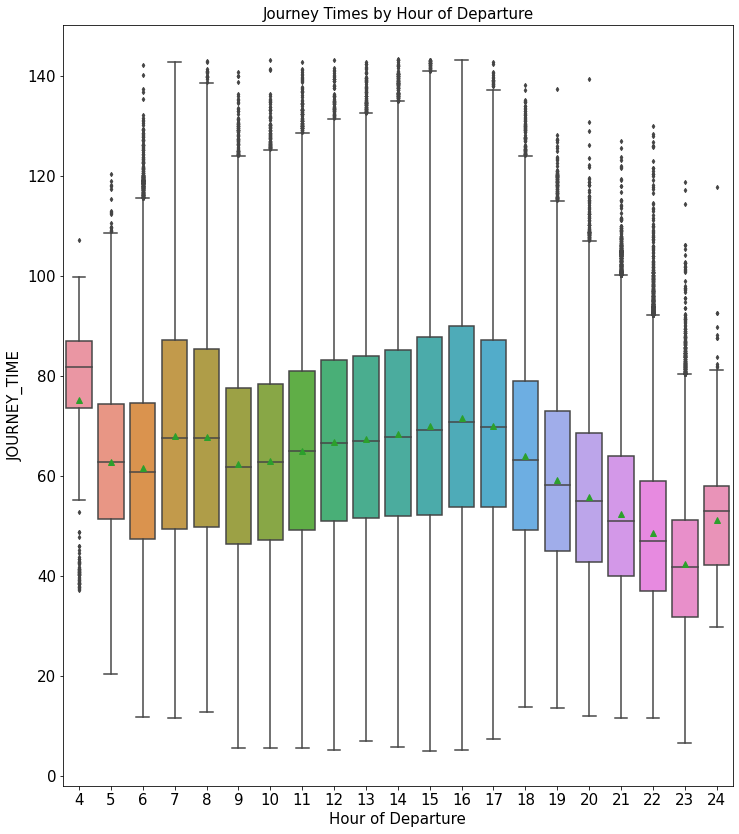

In [46]:
fig, ax = plt.subplots(figsize=(12,14))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.boxplot(x = trips_modelling['HOUR_DEPARTURE'], y=trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True)
plt.xlabel('Hour of Departure')

plt.title('Journey Times by Hour of Departure')
plt.show()

In [47]:
hourDummies = pd.get_dummies(trips_modelling['HOUR_DEPARTURE'], prefix='HOUR_DEPARTURE', drop_first=True)
trips_modelling = pd.concat([trips_modelling, hourDummies], axis=1)

<b>Encoding weekdays</b>

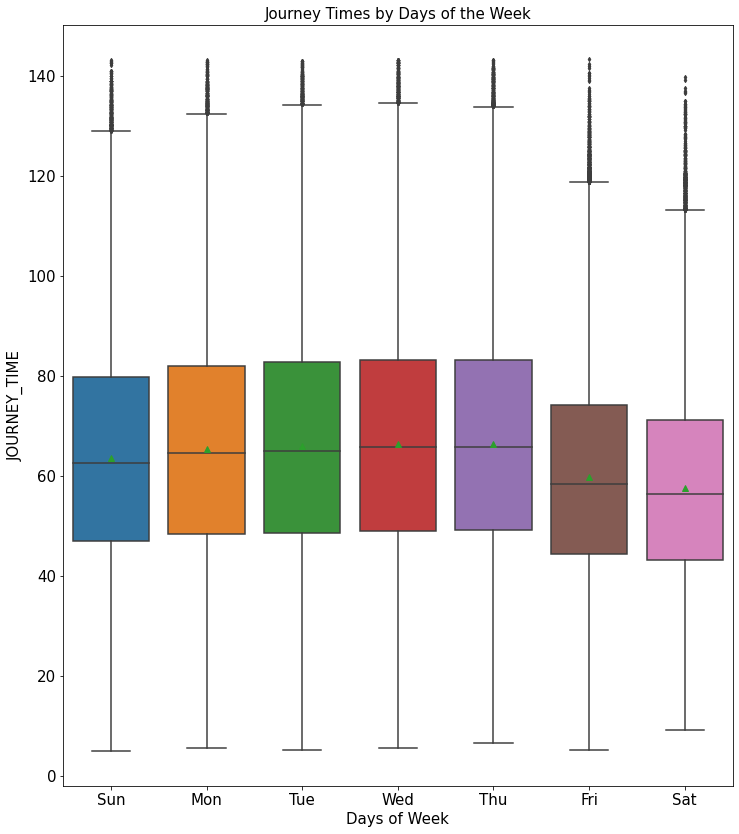

In [48]:
labels =["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]


fig, ax = plt.subplots(figsize=(12,14))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.boxplot(x = trips_modelling['DAYOFWEEK'], y=trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True)
ax.set_xticklabels(labels)
plt.xlabel('Days of Week')

plt.title('Journey Times by Days of the Week')
plt.show()

Clearly the day of the week has an impact, although it is not ordinal. I will use get_dummies to encode them.

In [49]:
dayDummies = pd.get_dummies(trips_modelling['DAYOFWEEK'], prefix='DAYOFWEEK', drop_first=True)
trips_modelling = pd.concat([trips_modelling, dayDummies], axis=1)

<b>Encoding month</b>

In [50]:
trips_modelling['MONTH'] = trips_modelling['DAYOFSERVICE'].dt.month
trips_modelling["MONTH"] =  trips_modelling["MONTH"].astype("category")

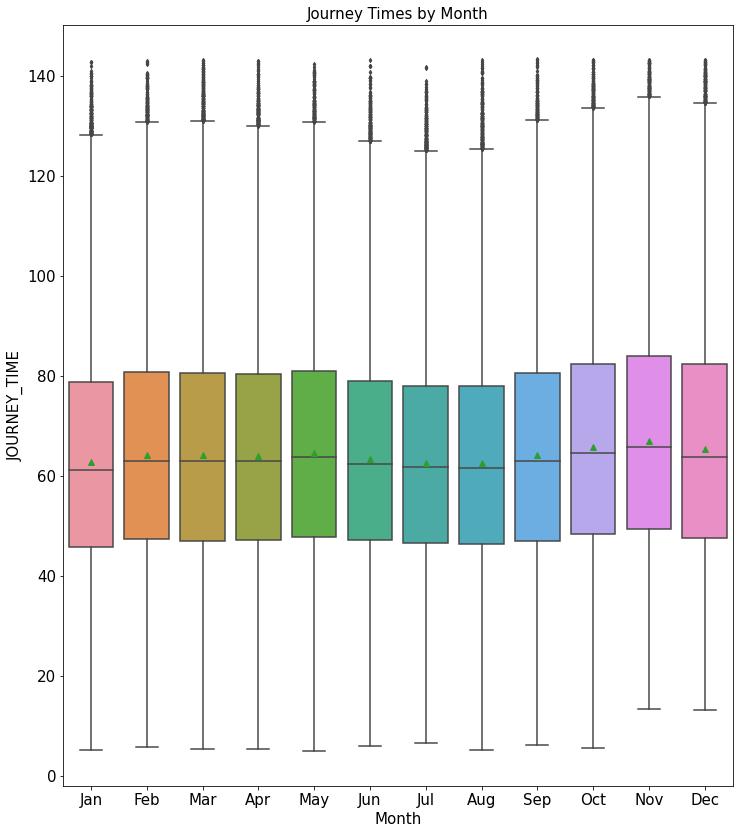

In [51]:
labels =["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


fig, ax = plt.subplots(figsize=(12,14))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.boxplot(x = trips_modelling['MONTH'], y=trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True)
ax.set_xticklabels(labels)
plt.xlabel('Month')

plt.title('Journey Times by Month')
plt.show()

In [52]:
monthDummies = pd.get_dummies(trips_modelling['MONTH'], prefix='MONTH', drop_first=True)
trips_modelling = pd.concat([trips_modelling, monthDummies], axis=1)

<b>Encoding weather</b>

In [53]:
trips_modelling['weather_main'].unique()

['Drizzle', 'Clouds', 'Rain', 'Mist', 'Fog', 'Clear', 'Snow', 'Smoke', 'Thunderstorm']
Categories (9, object): ['Clear', 'Clouds', 'Drizzle', 'Fog', ..., 'Rain', 'Smoke', 'Snow', 'Thunderstorm']

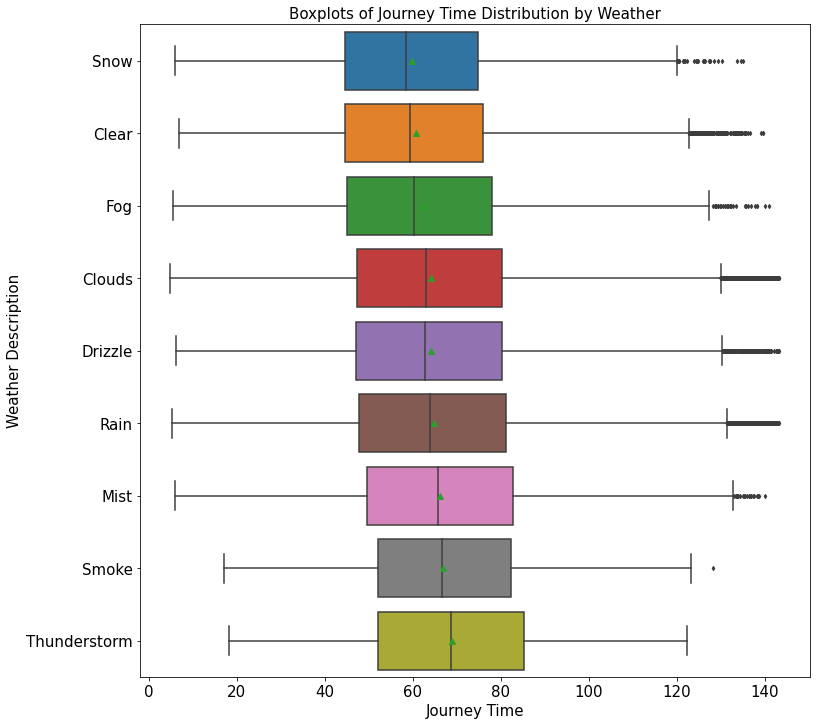

In [54]:
fig, ax = plt.subplots(figsize=(12,12))
means = trips_modelling['JOURNEY_TIME'].groupby(trips_modelling["weather_main"]).mean().sort_values().index
sns.boxplot(y=trips_modelling['weather_main'], x = trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True, order=means)
plt.xlabel('Journey Time')
plt.ylabel('Weather Description')
plt.title('Boxplots of Journey Time Distribution by Weather')
plt.show()

In [55]:
trips_modelling['weather_main'].value_counts(dropna=False)

Clouds          1176048
Rain             361862
Drizzle          129262
Clear             87784
Mist              24837
Fog               17580
Snow              12484
Thunderstorm        364
Smoke               349
Name: weather_main, dtype: int64

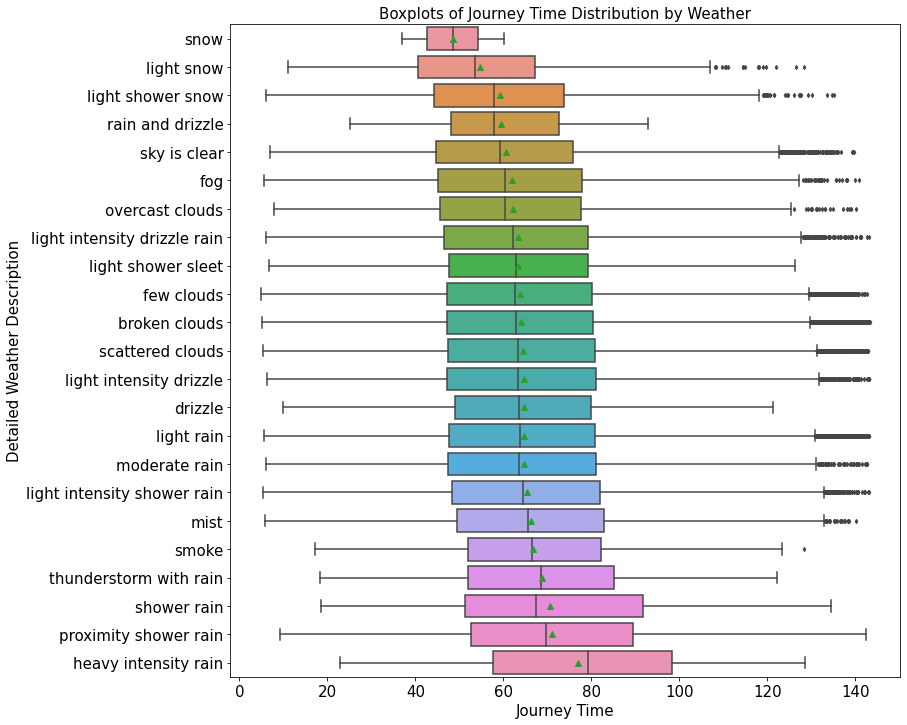

In [56]:
fig, ax = plt.subplots(figsize=(12,12))
means = trips_modelling['JOURNEY_TIME'].groupby(trips_modelling["weather_description"]).mean().sort_values().index
sns.boxplot(y=trips_modelling['weather_description'], x = trips_modelling['JOURNEY_TIME'], fliersize = 3, showmeans = True, order=means)
plt.xlabel('Journey Time')
plt.ylabel('Detailed Weather Description')
plt.title('Boxplots of Journey Time Distribution by Weather')
plt.show()

In [57]:
trips_modelling['weather_description'].value_counts(dropna=False)

broken clouds                   697499
light rain                      253958
scattered clouds                244176
few clouds                      227363
sky is clear                     87784
light intensity drizzle          82221
light intensity shower rain      75390
light intensity drizzle rain     45010
moderate rain                    28687
mist                             24837
fog                              17580
light shower snow                 7445
overcast clouds                   7010
light shower sleet                3475
proximity shower rain             3008
drizzle                           2002
light snow                        1562
heavy intensity rain               417
shower rain                        402
thunderstorm with rain             364
smoke                              349
rain and drizzle                    29
snow                                 2
Name: weather_description, dtype: int64

With minimal value counts for those categories that impact journey time the most, it seems modelling these will be largely insiginificant. That being said, those involving rain do seem to have some impact, and this intuitively makes sense.

- In addition, we can to a certain extent see a more discernible trend in the individual routes than the entire dataset (see below)

I will continue by encoding those journeys occuring during rain with a 1, and 0 otherwise.

In [58]:
trips_modelling

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2018-02-07,6253783,87245,84600,87524,84600,NaN,2,23,48.733333,...,0,0,0,0,0,0,0,0,0,0
1,2018-02-07,6254942,35512,32100,36329,32082,NaN,2,8,70.783333,...,0,0,0,0,0,0,0,0,0,0
2,2018-02-07,6259460,57261,54420,58463,54443,NaN,2,15,67.000000,...,0,0,0,0,0,0,0,0,0,0
3,2018-02-07,6248240,41648,37200,42019,37538,NaN,2,10,74.683333,...,0,0,0,0,0,0,0,0,0,0
4,2018-02-07,6251760,34768,28920,35709,28929,NaN,2,8,113.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810565,2018-05-14,6765652,30626,29100,30482,29119,NaN,0,8,22.716667,...,0,0,1,0,0,0,0,0,0,0
1810566,2018-05-14,6765662,65950,64800,66270,64815,NaN,0,18,24.250000,...,0,0,1,0,0,0,0,0,0,0
1810567,2018-05-14,6765828,28647,25800,28688,25858,NaN,0,7,47.166667,...,0,0,1,0,0,0,0,0,0,0
1810568,2018-05-14,6765849,61560,57840,61365,57859,NaN,0,16,58.433333,...,0,0,1,0,0,0,0,0,0,0


In [59]:
trips_modelling['weather_main'] = trips_modelling['weather_main'].apply(lambda x: 1 if (x == "Rain" or x == "Mist" or x == "Thunderstorm") else 0)

In [60]:
# calculate correlation coefficient
r, p = stats.pearsonr(trips_modelling['weather_main'], trips_modelling['JOURNEY_TIME'])
print('Pearson\'s correlation r is %s with a p-value = %s' %(r,p))

Pearson's correlation r is 0.020294933673767016 with a p-value = 3.1284218402149966e-164


In [61]:
trips_modelling['weather_main'].value_counts(dropna=False)

0    1423507
1     387063
Name: weather_main, dtype: int64

In [62]:
trips_modelling.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
SUPPRESSED                     float64
DAYOFWEEK                     category
HOUR_DEPARTURE                category
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                     int64
weather_description             object
weather_icon                    object
date                            object
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
HOUR_DEPARTURE_5                 uint8
HOUR_DEPARTURE_6                 uint8
HOUR_DEPARTURE_7                 uint8
HOUR_DEPARTURE_8                 uint8
HOUR_DEPARTURE_9                 uint8
HOUR_DEPARTURE_10        

In [63]:
trips_modelling = trips_modelling.drop({'DAYOFSERVICE', "TRIPID", "PLANNEDTIME_ARR", "PLANNEDTIME_DEP", "ACTUALTIME_ARR","ACTUALTIME_DEP", "SUPPRESSED", "DAYOFWEEK", "HOUR_DEPARTURE", "temp", "visibility", "wind_speed", "weather_description", "weather_icon", "date", "planned_journey_time", "error", "MONTH"}, axis=1)

In [64]:
trips_modelling.dtypes

JOURNEY_TIME          float64
weather_main            int64
LINE_DIRECTION       category
HOUR_DEPARTURE_5        uint8
HOUR_DEPARTURE_6        uint8
HOUR_DEPARTURE_7        uint8
HOUR_DEPARTURE_8        uint8
HOUR_DEPARTURE_9        uint8
HOUR_DEPARTURE_10       uint8
HOUR_DEPARTURE_11       uint8
HOUR_DEPARTURE_12       uint8
HOUR_DEPARTURE_13       uint8
HOUR_DEPARTURE_14       uint8
HOUR_DEPARTURE_15       uint8
HOUR_DEPARTURE_16       uint8
HOUR_DEPARTURE_17       uint8
HOUR_DEPARTURE_18       uint8
HOUR_DEPARTURE_19       uint8
HOUR_DEPARTURE_20       uint8
HOUR_DEPARTURE_21       uint8
HOUR_DEPARTURE_22       uint8
HOUR_DEPARTURE_23       uint8
HOUR_DEPARTURE_24       uint8
DAYOFWEEK_1             uint8
DAYOFWEEK_2             uint8
DAYOFWEEK_3             uint8
DAYOFWEEK_4             uint8
DAYOFWEEK_5             uint8
DAYOFWEEK_6             uint8
MONTH_2                 uint8
MONTH_3                 uint8
MONTH_4                 uint8
MONTH_5                 uint8
MONTH_6   

<b>Route Selection</b>

In [66]:
fortySixA1 = trips_modelling.loc[trips_modelling['LINE_DIRECTION']=="46A_1"]
fortySixA1 = fortySixA1.drop(columns=["LINE_DIRECTION"])

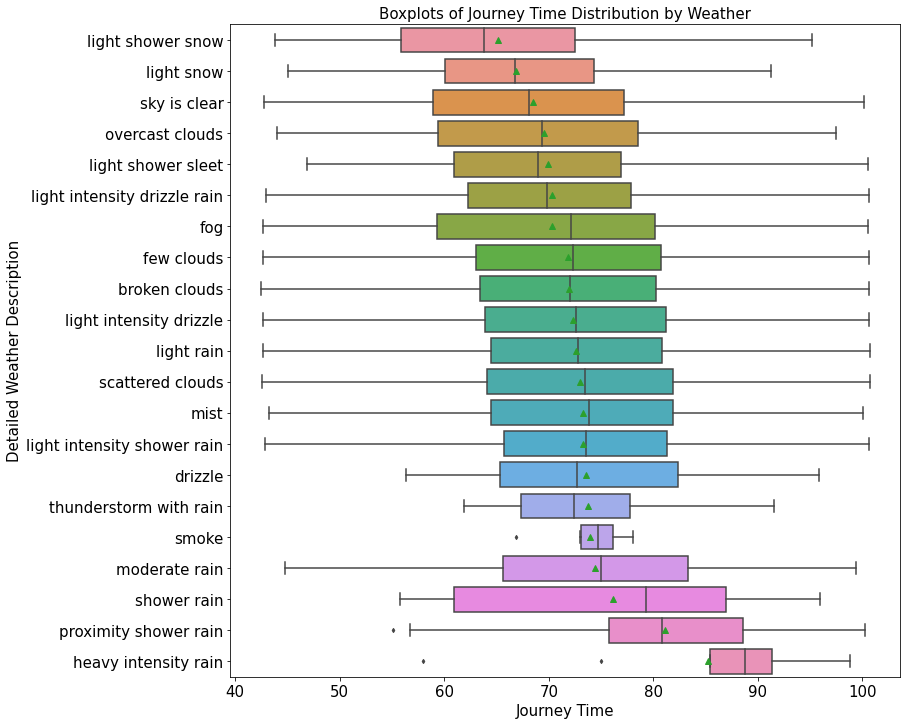

In [43]:
fig, ax = plt.subplots(figsize=(12,12))
means = fortySixA1['JOURNEY_TIME'].groupby(fortySixA1["weather_description"]).mean().sort_values().index
sns.boxplot(y=fortySixA1['weather_description'], x = fortySixA1['JOURNEY_TIME'], fliersize = 3, showmeans = True, order=means)
plt.xlabel('Journey Time')
plt.ylabel('Detailed Weather Description')
plt.title('Boxplots of Journey Time Distribution by Weather')
plt.show()

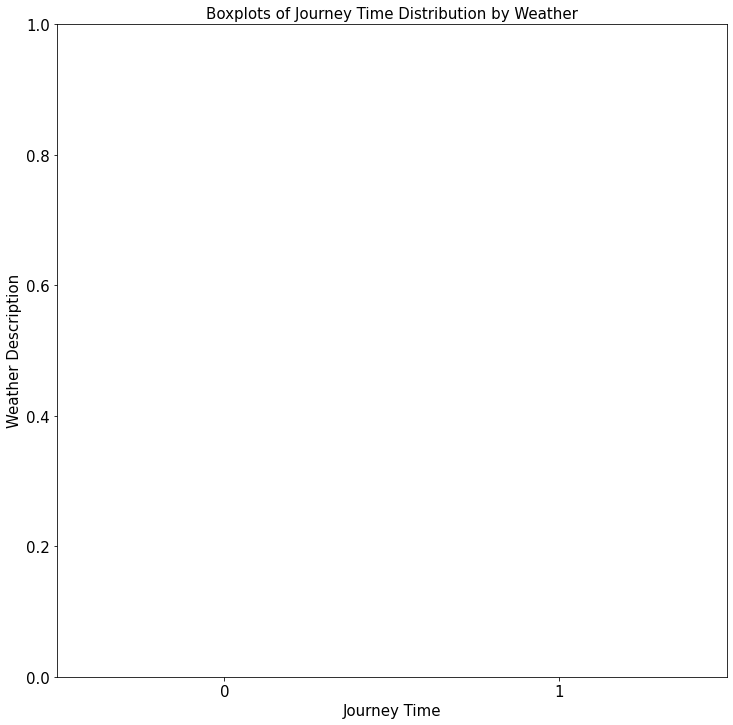

In [44]:
fig, ax = plt.subplots(figsize=(12,12))
means = fortySixA1['JOURNEY_TIME'].groupby(fortySixA1["weather_main"]).mean().sort_values().index
sns.boxplot(y=fortySixA1['weather_main'], x = fortySixA1['JOURNEY_TIME'], fliersize = 3, showmeans = True, order=means)
plt.xlabel('Journey Time')
plt.ylabel('Weather Description')
plt.title('Boxplots of Journey Time Distribution by Weather')
plt.show()

In [67]:
# calculate correlation coefficient
r, p = stats.pearsonr(fortySixA1['weather_main'], fortySixA1['JOURNEY_TIME'])
print('Pearson\'s correlation r is %s with a p-value = %s' %(r,p))

Pearson's correlation r is 0.042346915517890354 with a p-value = 5.499219313921344e-15


In [68]:
sixteen = trips_modelling.loc[trips_modelling['LINE_DIRECTION']=="16_1"]
sixteen = sixteen.drop(columns=["LINE_DIRECTION"])

In [69]:
sixteen

,JOURNEY_TIME,weather_main,HOUR_DEPARTURE_5,HOUR_DEPARTURE_6,HOUR_DEPARTURE_7,HOUR_DEPARTURE_8,HOUR_DEPARTURE_9,HOUR_DEPARTURE_10,HOUR_DEPARTURE_11,HOUR_DEPARTURE_12,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
5,79.433333,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
35,69.566667,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,65.900000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,69.933333,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292,80.250000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809649,88.266667,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1809674,105.750000,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1809976,106.350000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1810195,94.266667,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
onefourfive = trips_modelling.loc[trips_modelling['LINE_DIRECTION']=="145_1"]
onefourfive = onefourfive.drop(columns=["LINE_DIRECTION"])

In [49]:
fortySixA1.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,...,MONTH_9,MONTH_10,MONTH_11,MONTH_12,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5,DAYOFWEEK_6
count,3.402900e+04,34029.000000,34029.000000,34029.000000,34029.000000,4.0,34029.000000,34029.000000,34029.000000,34029.000000,...,34029.00000,34029.000000,34029.000000,34029.000000,34029.000000,34029.000000,34029.000000,34029.000000,34029.000000,34029.000000
mean,7.141246e+06,55151.087367,51076.364278,55418.765759,51096.881954,0.0,13.693262,72.031397,11.316316,9593.165402,...,0.08052,0.085457,0.084399,0.071380,0.162744,0.158394,0.154163,0.155955,0.116136,0.098534
std,7.362396e+05,16460.817192,16629.405824,16486.579196,16627.146207,0.0,4.622604,11.996892,5.583090,1438.768819,...,0.27210,0.279564,0.277989,0.257463,0.369137,0.365116,0.361110,0.362818,0.320393,0.298039
min,5.955251e+06,20985.000000,18900.000000,21583.000000,18895.000000,0.0,5.000000,42.450000,-4.610000,100.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.583744e+06,40953.000000,36960.000000,41092.000000,36940.000000,0.0,10.000000,63.333333,7.390000,9999.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.099905e+06,55052.000000,50880.000000,55384.000000,50859.000000,0.0,14.000000,72.283333,11.000000,9999.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.019562e+06,68915.000000,64320.000000,69265.000000,64531.000000,0.0,17.000000,80.633333,15.390000,9999.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.591174e+06,87162.000000,84600.000000,88928.000000,84608.000000,0.0,23.000000,100.683333,26.920000,10000.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
sixteen.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,...,MONTH_9,MONTH_10,MONTH_11,MONTH_12,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5,DAYOFWEEK_6
count,2.024900e+04,20249.000000,20249.000000,20249.000000,20249.000000,8.0,20249.000000,20249.000000,20249.000000,20249.000000,...,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000
mean,7.155783e+06,55855.064151,50665.379031,56240.596128,50761.710159,0.0,13.640427,91.314766,11.401065,9609.233793,...,0.078868,0.085486,0.081436,0.081041,0.162181,0.158823,0.148649,0.147760,0.129685,0.096005
std,7.428494e+05,16112.596406,16124.124587,16109.393701,16130.437478,0.0,4.463087,13.135146,5.560745,1408.995834,...,0.269539,0.279610,0.273510,0.272905,0.368626,0.365520,0.355751,0.354871,0.335965,0.294605
min,5.955279e+06,24680.000000,21600.000000,25285.000000,21549.000000,0.0,5.000000,61.533333,-4.610000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.591171e+06,42304.000000,37440.000000,42702.000000,37419.000000,0.0,10.000000,82.066667,7.390000,9999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.104757e+06,55228.000000,49680.000000,55710.000000,49771.000000,0.0,13.000000,91.800000,11.340000,9999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.022604e+06,68598.000000,63000.000000,69175.000000,63051.000000,0.0,17.000000,100.566667,15.390000,9999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.591828e+06,87508.000000,82800.000000,89690.000000,83217.000000,0.0,23.000000,121.050000,26.920000,10000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
onefourfive.describe()

,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,...,MONTH_9,MONTH_10,MONTH_11,MONTH_12,DAYOFWEEK_1,DAYOFWEEK_2,DAYOFWEEK_3,DAYOFWEEK_4,DAYOFWEEK_5,DAYOFWEEK_6
count,2.656900e+04,26569.000000,26569.000000,26569.000000,26569.000000,10.0,26569.000000,26569.000000,26569.000000,26569.000000,...,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000,26569.000000
mean,7.130484e+06,56869.176258,52158.560729,57225.778689,52193.104182,0.0,13.996123,83.877908,11.411330,9630.463421,...,0.077873,0.084535,0.084234,0.065302,0.173285,0.165042,0.165117,0.160036,0.101208,0.076706
std,7.291121e+05,16639.787289,16703.800813,16641.955756,16707.509887,0.0,4.644339,12.423384,5.556667,1370.208026,...,0.267976,0.278193,0.277743,0.247062,0.378500,0.371225,0.371293,0.366646,0.301610,0.266129
min,5.955478e+06,26357.000000,22800.000000,26142.000000,22712.000000,0.0,6.000000,53.416667,-4.610000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.592983e+06,42380.000000,37800.000000,42790.000000,37916.000000,0.0,10.000000,75.116667,7.390000,9999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.099808e+06,57485.000000,52200.000000,57910.000000,52692.000000,0.0,14.000000,83.750000,11.390000,9999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.015503e+06,70519.000000,65400.000000,70991.000000,65564.000000,0.0,18.000000,92.866667,15.390000,9999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.591856e+06,88657.000000,84300.000000,90518.000000,84702.000000,0.0,23.000000,113.250000,26.920000,10000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
sixteen.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
SUPPRESSED                     float64
DAYOFWEEK                     category
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                     int64
weather_description             object
weather_icon                    object
date                            object
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
DAYOFWEEK_1                      uint8
DAYOFWEEK_2                      uint8
DAYOFWEEK_3                      uint8
DAYOFWEEK_4                      uint8
DAYOFWEEK_5                      uint8
DAYOFWEEK_6              

<AxesSubplot:xlabel='Days of the Week', ylabel='Journey Times Average'>

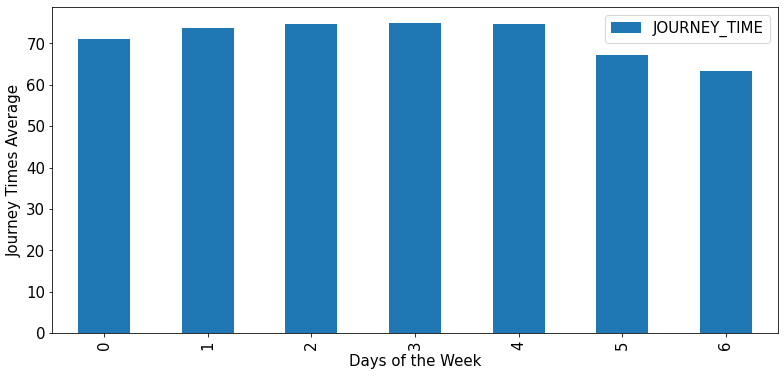

In [53]:
fortySixA1.groupby(by ="DAYOFWEEK").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(13, 6), ylabel="Journey Times Average", xlabel="Days of the Week")

 - There is noticeably more dispersion of journey times on days 1 to 5, with day 7 being the shortest and most consistent time for the bus route.
 - The fact thart there is a noticeable variation by day suggests that this feature will give some value in predicting the target feature.
##### removing outliers is based off of this information but must be done earlier, before the dataframe was divided by route and direction.

<AxesSubplot:xlabel='Time of the Day', ylabel='Journey Times Average'>

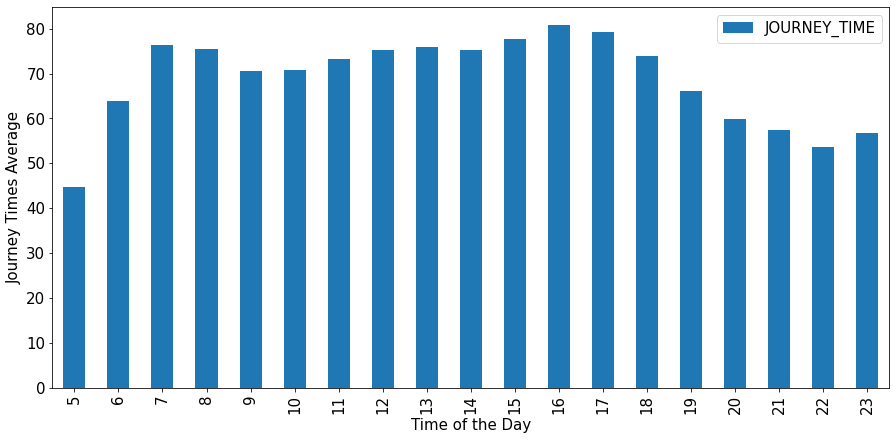

In [54]:
fortySixA1.groupby(by ="HOUR_DEPARTURE").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Time of the Day")


- The time of day feature shows a large variation in journey times, with an expectedly lower journey time in the early hours of the morning and longer journey times during traditional work start and finish times.
- This will likely be a highly leveraged feature in the ML model.

<AxesSubplot:xlabel='Temperature Categoris (cold to warm)', ylabel='Journey Times Average'>

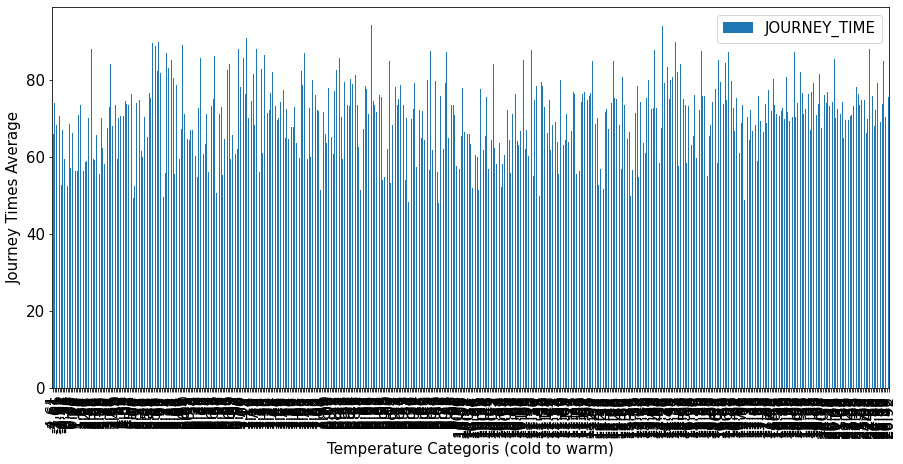

In [55]:

fortySixA1.groupby(by ="temp").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Temperature Categoris (cold to warm)")

- The temperature feature show a very slight change in journey times, with a gradual increase when the weather is warmer as well as an increase when the weather drops below zero.


In [57]:
# fortySixA1.groupby(by ="weather_icon").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Weather Icon")

- The original data for the weather was in the for 1n, 1d to denote differene for day and night as well as weather before being factorised. Hence whiy the chart goes up and down.
- The weather icon doesnt seem add much as the time of day will indicate whether it is day or night anyway and the weather description will indicate the weather.

<AxesSubplot:xlabel='Visibiliy Level', ylabel='Journey Times Average'>

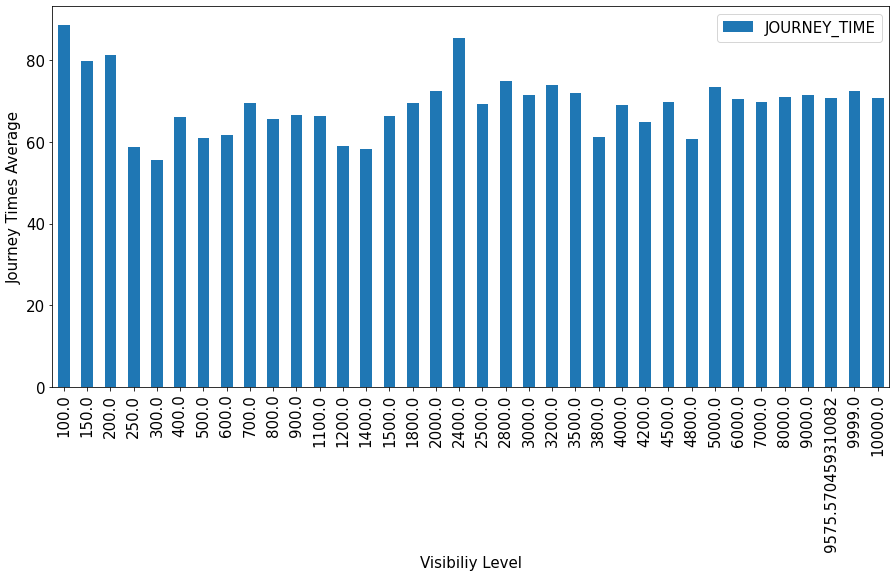

In [58]:
fortySixA1.groupby(by ="visibility").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Visibiliy Level")

- Visibility doesn't appear to have a clear influence on the target feature. The variance between each column is likely just a sample bias.
- It should be exceluded from the ML model.

<AxesSubplot:xlabel='Weather Description Category', ylabel='Journey Times Average'>

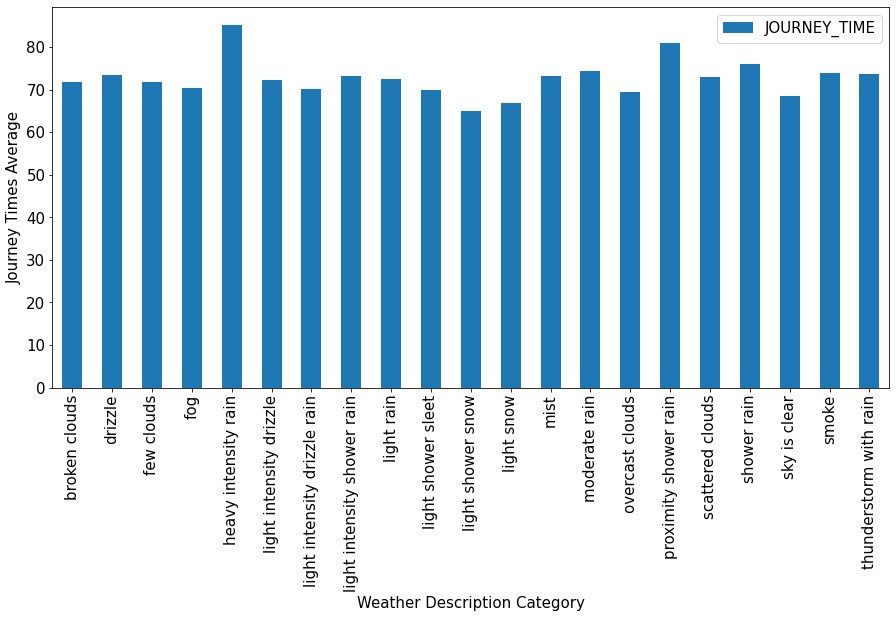

In [59]:
fortySixA1.groupby(by ="weather_description").mean().plot(kind = "bar", y="JOURNEY_TIME", figsize=(15, 7), ylabel="Journey Times Average", xlabel="Weather Description Category")

- The order in which the weather description categories were factorised is not based on the severity so pay no attention to the order.
- There is some variance between different categories with one unusually short average journey time for category 18. I suspect this is on days of extreme weather when many routes may be closed.
- The feature appears to hold some value.

<b>Train/Test Splitting</b>

In [60]:
# setting random state to 0 as does not matter that order is the same each time once its shuffled
# setting test_size to 30%
# using sklearns train_test_split method
train_46, test_46 = train_test_split(fortySixA1, test_size=0.3, random_state=0)
train_145, test_145 = train_test_split(onefourfive, test_size=0.3, random_state=0)
train_16, test_16 = train_test_split(sixteen, test_size=0.3, random_state=0)

In [61]:
# resetting the indexes of both to start at 0 (preserves order generated above)
train_46 = train_46.reset_index(drop=True)
test_46 = test_46.reset_index(drop=True)

train_145 = train_145.reset_index(drop=True)
test_145 = test_145.reset_index(drop=True)

train_16 = train_16.reset_index(drop=True)
test_16 = test_16.reset_index(drop=True)

In [63]:
print("Training dataset for 46A has", train_46.shape[0], "rows and test dataset has", test_46.shape[0], "rows.")

print("Training dataset for 145 has", train_145.shape[0], "rows and test dataset has", test_145.shape[0], "rows.")

print("Training dataset for 16 has", train_16.shape[0], "rows and test dataset has", test_16.shape[0], "rows.")


Training dataset for 46A has 23820 rows and test dataset has 10209 rows.
Training dataset for 145 has 18598 rows and test dataset has 7971 rows.
Training dataset for 16 has 14174 rows and test dataset has 6075 rows.


In [64]:
# verify datatypes have remained intact
train_46.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
SUPPRESSED                     float64
DAYOFWEEK                     category
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                     int64
weather_description             object
weather_icon                    object
date                            object
LINE_DIRECTION                category
planned_journey_time           float64
error                          float64
DAYOFWEEK_1                      uint8
DAYOFWEEK_2                      uint8
DAYOFWEEK_3                      uint8
DAYOFWEEK_4                      uint8
DAYOFWEEK_5                      uint8
DAYOFWEEK_6              

In [ ]:
predict_columns = ['HOUR_DEPARTURE', 'DAYOFWEEK', "temp", "weather_icon", "wind_speed", "weather_description"]
predictions = [feature for feature in predict_columns]
target = 'JOURNEY_TIME'

<b>Linear Regression Modelling</b>

<b>Random Forest Modelling</b>

In [ ]:
# initialise the RandomForestClassifier
# set random state value so that results can be replicated
forestReg_46 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)

forestReg_145 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)

forestReg_16 = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)


# fit the model on the training set using the predictions features
# y value is now the quantiles
forestReg_46.fit(train_46[predictions], train_46[target])

forestReg_145.fit(train_145[predictions], train_145[target])

forestReg_16.fit(train_16[predictions], train_16[target])

In [ ]:
feature_importance_46 = pd.DataFrame({'feature': train_46[predictions].columns, 'importance':forestReg_46.feature_importances_})
print("Feature Importance Random Forest Regressor for 46A: ")
feature_importance_46.sort_values('importance', ascending=False)

In [ ]:
feature_importance_145 = pd.DataFrame({'feature': train_145[predictions].columns, 'importance':forestReg_145.feature_importances_})
print("Feature Importance Random Forest Regressor for 145:")
feature_importance_145.sort_values('importance', ascending=False)

In [ ]:
feature_importance_16 = pd.DataFrame({'feature': train_46[predictions].columns, 'importance':forestReg_16.feature_importances_})
print("Feature Importance Random Forest Regressor for 16:")
feature_importance_16.sort_values('importance', ascending=False)

In [ ]:
sorted_idx = forestReg_46.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

In [ ]:
sorted_idx = forestReg_145.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

In [ ]:
sorted_idx = forestReg_16.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train_46[predictions].columns[sorted_idx], forestReg_46.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

In [ ]:
forestRegPredictedTrain46_10 = forestReg_46.predict(test_46[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 46a:")
predicted_df_train_reg_46 = pd.concat([test_46[target].head(10), pd.DataFrame(forestRegPredictedTrain46_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_46

In [ ]:
forestRegPredictedTrain145_10 = forestReg_145.predict(test_145[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 145a:")
predicted_df_train_reg_145 = pd.concat([test_145[target].head(10), pd.DataFrame(forestRegPredictedTrain145_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_145

In [ ]:
forestRegPredictedTrain16_10 = forestReg_16.predict(test_16[predictions].head(10))
print("First 10 predictions with Random Forest Regression for Route 16:")
predicted_df_train_reg_16 = pd.concat([test_16[target].head(10), pd.DataFrame(forestRegPredictedTrain16_10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg_16

In [ ]:
# predict entire training dataset using random forest regressor model
forestRegPredictedTrain = forestReg.predict(train[predictions])

In [ ]:
# used to compute all metrics
def RegressionMetrics(actualVal, predictions, num_pred, num_samples):
    # classification evaluation measures
    print("MAE:", metrics.mean_absolute_error(actualVal, predictions))
    print("MAPE:", metrics.mean_absolute_percentage_error(actualVal, predictions))
    
    print("RMSE:", metrics.mean_squared_error(actualVal, predictions)**0.5)
    r2 = metrics.r2_score(actualVal, predictions)
    print("R2:", r2)
    print("Adjusted R2:", 1 - ((1-r2) * ((num_samples-1)/(num_samples-num_pred-1))))

In [ ]:
predictors = train[predictions].shape[1]
print("\u0332".join("Regression Evaluation Measures for Training Set"))
RegressionMetrics(train[target], forestRegPredictedTrain, predictors, train.shape[0])

In [ ]:
[estimator.get_depth() for estimator in forestReg.estimators_]

In [ ]:
leavetimes = pd.read_csv('rt_leavetimes_DB_2018.txt', sep=";", nrows=10000)

In [ ]:
leavetimes